# Trabajo sobre la calidad del aire en la Comunidad de Madrid desde 2001 hasta 2022.

Dataset sacado de la dirección: <https://datos.madrid.es/sites/v/index.jsp?vgnextoid=aecb88a7e2b73410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD>

## Paso 0: Importamos las librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Paso 0.1: Ajustamos las filas y columnas que deseemos ver

In [2]:
pd.options.display.max_rows=10
pd.options.display.max_columns=99

In [3]:
pd.options.mode.chained_assignment = None

## Paso 1: Obtenemos el dataset y la información sobre la estructura del DataFrame.

In [4]:
years = range(1,23)
fragments = []

for year in years:
    path = 'C:/Users/Usuario/OneDrive - Universidad Politécnica de Madrid/Trabajo_pcd/datos/datos%d.csv' % year
    frame = pd.read_csv(path, sep=';')

    fragments.append(frame)

data = pd.concat(fragments, ignore_index = True)
data

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,V02,D03,V03,D04,V04,D05,V05,D06,V06,D07,V07,D08,V08,D09,V09,D10,V10,D11,V11,D12,V12,D13,V13,D14,V14,D15,V15,D16,V16,D17,V17,D18,V18,D19,V19,D20,V20,D21,V21,D22,V22,D23,V23,D24,V24,D25,V25,D26,V26,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2001,1,17.0,V,15.0,V,15.0,V,15.0,V,16.0,V,20.0,V,25.0,V,30.0,V,32.0,V,33.0,V,21.0,V,36.0,V,39.0,V,34.0,V,23.0,V,16.0,V,16.0,V,17.0,V,27.0,V,40.0,V,32.0,V,29.0,V,17.0,V,17.0,V,14.0,V,12.0,V,19.0,V,17.0,V,35.0,V,40.0,V,53.0,V
1,28,79,4,1,28079004_1_38,2001,2,40.0,V,42.0,V,38.0,V,29.0,V,18.0,V,23.0,V,16.0,V,17.0,V,17.0,V,21.0,V,36.0,V,40.0,V,37.0,V,26.0,V,23.0,V,27.0,V,33.0,V,26.0,V,26.0,V,40.0,V,42.0,V,42.0,V,42.0,V,27.0,V,21.0,V,22.0,V,20.0,V,22.0,V,0.0,N,0.0,N,0.0,N
2,28,79,4,1,28079004_1_38,2001,3,19.0,V,18.0,V,13.0,V,11.0,V,15.0,V,23.0,V,15.0,V,12.0,V,11.0,V,10.0,V,13.0,V,20.0,V,16.0,V,28.0,V,25.0,V,17.0,V,12.0,V,11.0,V,14.0,V,20.0,V,14.0,V,19.0,V,30.0,V,14.0,V,11.0,V,14.0,V,14.0,V,15.0,V,17.0,V,20.0,V,19.0,V
3,28,79,4,1,28079004_1_38,2001,4,14.0,V,17.0,V,13.0,V,10.0,V,9.0,V,17.0,V,11.0,V,10.0,V,16.0,V,17.0,V,12.0,V,8.0,V,8.0,V,9.0,V,14.0,V,18.0,V,12.0,V,13.0,V,17.0,V,13.0,V,15.0,V,16.0,V,10.0,V,9.0,V,11.0,V,12.0,V,12.0,V,13.0,V,15.0,V,14.0,V,0.0,N
4,28,79,4,1,28079004_1_38,2001,5,10.0,V,11.0,V,16.0,V,18.0,V,15.0,V,13.0,V,13.0,V,17.0,V,13.0,V,13.0,V,18.0,V,14.0,V,8.0,V,9.0,V,8.0,V,9.0,V,9.0,V,9.0,V,9.0,V,8.0,V,9.0,V,9.0,V,11.0,V,11.0,V,13.0,V,13.0,V,11.0,V,15.0,V,16.0,V,15.0,V,18.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31655,28,79,60,14,28079060_14_6,2022,7,80.0,V,83.0,V,75.0,V,82.0,N,75.0,V,77.0,V,74.0,N,83.0,V,100.0,V,97.0,V,92.0,V,99.0,V,104.0,V,103.0,V,97.0,V,99.0,V,92.0,V,95.0,V,84.0,V,88.0,V,88.0,V,81.0,V,95.0,V,74.0,V,77.0,V,69.0,V,81.0,V,71.0,V,73.0,V,79.0,V,82.0,V
31656,28,79,60,14,28079060_14_6,2022,8,91.0,V,97.0,V,89.0,V,80.0,V,94.0,V,90.0,V,84.0,V,81.0,V,82.0,V,91.0,V,88.0,V,70.0,V,50.0,V,65.0,V,75.0,V,85.0,V,67.0,V,73.0,V,83.0,V,86.0,V,79.0,V,66.0,V,61.0,V,72.0,V,81.0,V,82.0,V,85.0,V,88.0,V,79.0,V,70.0,V,93.0,V
31657,28,79,60,14,28079060_14_6,2022,9,81.0,V,78.0,V,78.0,V,75.0,V,59.0,V,60.0,V,68.0,V,57.0,V,57.0,V,64.0,V,57.0,V,51.0,V,53.0,V,53.0,V,48.0,V,49.0,V,72.0,V,71.0,V,59.0,V,63.0,V,63.0,V,61.0,V,66.0,V,71.0,V,71.0,V,75.0,V,44.0,V,49.0,V,59.0,V,58.0,V,0.0,N
31658,28,79,60,14,28079060_14_6,2022,10,46.0,V,61.0,V,48.0,V,43.0,V,56.0,V,54.0,V,47.0,V,57.0,V,63.0,V,40.0,V,44.0,V,48.0,V,45.0,V,31.0,V,53.0,V,55.0,V,41.0,V,31.0,V,35.0,V,48.0,V,48.0,V,52.0,V,51.0,V,37.0,V,29.0,V,15.0,V,22.0,V,28.0,V,49.0,V,37.0,V,25.0,V


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31660 entries, 0 to 31659
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PROVINCIA       31660 non-null  int64  
 1   MUNICIPIO       31660 non-null  int64  
 2   ESTACION        31660 non-null  int64  
 3   MAGNITUD        31660 non-null  int64  
 4   PUNTO_MUESTREO  31660 non-null  object 
 5   ANO             31660 non-null  int64  
 6   MES             31660 non-null  int64  
 7   D01             31660 non-null  float64
 8   V01             31660 non-null  object 
 9   D02             31660 non-null  float64
 10  V02             31660 non-null  object 
 11  D03             31660 non-null  float64
 12  V03             31660 non-null  object 
 13  D04             31660 non-null  float64
 14  V04             31660 non-null  object 
 15  D05             31660 non-null  float64
 16  V05             31660 non-null  object 
 17  D06             31660 non-null 

## Paso 2: Analizar los datos recuperados.

### Paso 2.1: Analizar si alguna columna es candidata a convertirse en índice y observar el tipo de los datos.

In [6]:
data.index.is_unique      

True

In [7]:
cols_to_index= data.columns[data.nunique() == data.shape[0]].to_list()
cols_to_index            #Todas las columnas tienen valores repetidos y tampoco es recomedable convertirlas en índice por la organización de los datos.

[]

In [8]:
data.ANO.unique()         #Datos entre 2001 a 2022

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

In [9]:
data.MES.unique()         #Datos entre enero a diciembre (a excepción de 2022 que le falta diciembre)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [10]:
data.dtypes.value_counts()

object     32
float64    31
int64       6
dtype: int64

### Paso 2.2: Calcular el tamaño real del dataframe en memoria

In [11]:
initial_usage_memory = data.memory_usage(deep=True).sum()           
print("{:03.2f} MB".format(initial_usage_memory/1024 ** 2))

65.33 MB


### Paso 2.3: Generar técnicas descriptivas que resuman la tendencia central, la dispersión y la forma de la distribución del dataframe data 

In [12]:
numeric_cols = data.select_dtypes(include=[np.number])
numeric_cols.describe()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,ANO,MES,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31
count,31660.0,31660.0,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.00000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.00000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000
mean,28.0,79.0,31.803316,13.043557,2012.950474,6.482944,27.796346,28.358493,29.757439,30.155357,30.112249,28.666660,29.950186,29.997336,29.438636,36.771102,31.57829,31.934033,31.875655,29.807415,28.849909,30.229433,30.801579,30.836379,30.54711,29.992775,30.209047,30.617314,31.909983,29.951156,29.045744,30.273485,29.554585,29.816848,27.795707,27.718262,17.536529
std,0.0,0.0,17.207588,10.709902,5.856104,3.444276,39.386716,40.581817,43.038029,46.916024,47.131433,40.294165,43.983181,42.428816,41.800397,773.814512,47.27999,49.496438,49.044572,45.105071,43.539964,49.796815,45.246964,44.315121,116.82749,43.690367,45.361075,46.492392,146.158190,41.395386,43.945990,44.076901,43.748369,43.777369,43.112657,43.570168,37.050771
min,28.0,79.0,4.000000,1.000000,2001.000000,1.000000,0.000000,0.000000,-0.070000,0.000000,0.000000,-0.040000,-0.020000,-0.020000,-0.050000,-0.050000,-0.05000,-0.080000,-0.040000,0.000000,-0.140000,0.000000,0.000000,0.000000,0.00000,-0.060000,-0.220000,0.000000,-0.060000,-0.050000,-0.070000,-0.120000,-0.080000,-0.060000,0.000000,-0.040000,0.000000
25%,28.0,79.0,17.000000,7.000000,2009.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.210000,1.000000,0.000000
50%,28.0,79.0,35.000000,10.000000,2013.000000,6.000000,14.000000,15.000000,15.000000,14.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000,16.00000,16.000000,16.000000,15.000000,15.000000,15.400000,16.000000,16.000000,15.00000,15.000000,15.000000,15.000000,16.000000,16.000000,15.000000,16.000000,16.000000,15.000000,13.000000,12.000000,0.600000
75%,28.0,79.0,48.000000,14.000000,2018.000000,9.000000,40.000000,40.000000,42.000000,41.000000,41.000000,41.000000,42.000000,43.000000,42.000000,42.000000,44.00000,43.000000,43.000000,41.000000,41.000000,43.000000,43.000000,43.000000,42.00000,42.000000,42.000000,43.000000,44.000000,43.000000,42.000000,43.000000,42.000000,42.000000,40.000000,39.000000,21.000000
max,28.0,79.0,60.000000,44.000000,2022.000000,12.000000,557.000000,666.000000,627.000000,838.000000,1031.000000,604.000000,654.000000,605.000000,637.000000,97396.000000,711.00000,851.000000,711.000000,1005.000000,1756.000000,4481.000000,603.000000,685.000000,19351.00000,704.000000,748.000000,850.000000,24742.000000,754.000000,2457.000000,1603.000000,1713.000000,1176.000000,1202.000000,741.000000,619.000000


In [13]:
object_cols = data.select_dtypes(include=[object])
object_cols.describe()

,PUNTO_MUESTREO,V01,V02,V03,V04,V05,V06,V07,V08,V09,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31
count,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660
unique,157,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,28079040_8_8,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V
freq,263,31055,31082,31100,31091,30998,31138,31102,31102,30954,30981,30983,31050,31103,31119,31068,30988,31088,31086,31136,31074,31067,31029,31032,31082,31102,31094,31094,31080,29009,28497,18095


## Paso 3: Comprobar si hay columnas susceptibles de ser eliminadas por contener información repetitiva y poco significativa.

In [14]:
cols_repetitive = data.columns[data.nunique() == 1].to_list()
cols_repetitive         #Los datos han sido cogidos sólo en la Comunidad de Madrid y en el Municipio de Arganda del Rey

['PROVINCIA', 'MUNICIPIO']

In [15]:
data.drop(cols_repetitive, axis='columns', inplace=True)

### Paso 3.1: Limpieza de datos en la columna PUNTO_MUESTREO; Uso de Expresiones Regulares

La columna PUNTO_MUESTREO está formada por el código donde están las estaciones, el compuesto que se está midiendo y la técnica de medida, en ese orden.
El código de muestreo es irrelevante teniendo ya en el dataframe la información de la estación (aunque este sea más exacto) y el compuesto que se está midiendo está presente ya en el dataframe como MAGNITUD. Lo que podríamos hacer es obtener la técnica de medida empleando *expresiones regulares*.

In [16]:
#El primer elemento de PUNTO_MUESTREO es el código postal donde está la estación por lo que no hace falta crear un diccionario que almacene dicha información

magnitud = {1:'Dióxido de Azufre', 6:'Monóxido de Carbono', 7:'Monóxido de Nitrógeno', 8:'Dióxido de Nitrógeno',9:'Partículas < 2.5 µm',
            10:'Partículas < 10 µm', 12:'Óxidos de Nitrógeno', 14:'Ozono', 20:'Tolueno', 30:'Benceno', 35:'Etilbenceno', 37:'Metaxileno', 
            38:'Paraxileno', 39:'Ortoxileno', 42:'Hidrocarburos totales (hexano)', 43:'Metano', 44:'Hidrocarburos no metánicos (hexano)'}

tecnica = {2:'Ionización de llama',  6:'Absorción ultravioleta', 8:'Quimioluminiscencia', 38:'Fluorescencia ultravioleta', 47:'Microbalanza', 
           48:'Absorción infrarroja', 59:'Cromatografía de gases'}

#Pero por temas de ahorro de memoria opto por dejar la información como venía, pero más adelante, a la hora de estudiar el dataset me vendrán
#bien estos diccionarios.

In [17]:
data.PUNTO_MUESTREO

0        28079004_1_38
1        28079004_1_38
2        28079004_1_38
3        28079004_1_38
4        28079004_1_38
             ...      
31655    28079060_14_6
31656    28079060_14_6
31657    28079060_14_6
31658    28079060_14_6
31659    28079060_14_6
Name: PUNTO_MUESTREO, Length: 31660, dtype: object

In [18]:
patron_tcn = r'^(?P<estacion>[0-9]{8})_(?P<magnitud>[0-9]{1,2})_(?P<tecnica>[2-9]{1,2})$'
data.PUNTO_MUESTREO.str.extract(patron_tcn)

,estacion,magnitud,tecnica
0,28079004,1,38
1,28079004,1,38
2,28079004,1,38
3,28079004,1,38
4,28079004,1,38
...,...,...,...
31655,28079060,14,6
31656,28079060,14,6
31657,28079060,14,6
31658,28079060,14,6


In [19]:
patron_tecn = r'^[0-9]{8}_[0-9]{1,2}_(?P<tecnica>[2-9]{1,2})$'
data.PUNTO_MUESTREO.str.match(patron_tecn).value_counts()

True    31660
Name: PUNTO_MUESTREO, dtype: int64

In [20]:
patron_tecn = r'^[0-9]{8}_[0-9]{1,2}_(?P<tecnica>[2-9]{1,2})$'
data['TECNICA'] = data.PUNTO_MUESTREO.str.extract(patron_tecn)
data['TECNICA'] = data['TECNICA'].astype(np.int64)                                         #son numeros enteros

data.drop(['PUNTO_MUESTREO'], axis='columns', inplace=True)
columnas = data.iloc[:, :2].columns.tolist() + data.iloc[:, 2:-1].columns.tolist()     
columnas.insert(2,'TECNICA')                                                          #recolocación de la columna TECNICA, para tener la información organizada
data = data[columnas]
data

,ESTACION,MAGNITUD,TECNICA,ANO,MES,D01,V01,D02,V02,D03,V03,D04,V04,D05,V05,D06,V06,D07,V07,D08,V08,D09,V09,D10,V10,D11,V11,D12,V12,D13,V13,D14,V14,D15,V15,D16,V16,D17,V17,D18,V18,D19,V19,D20,V20,D21,V21,D22,V22,D23,V23,D24,V24,D25,V25,D26,V26,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,4,1,38,2001,1,17.0,V,15.0,V,15.0,V,15.0,V,16.0,V,20.0,V,25.0,V,30.0,V,32.0,V,33.0,V,21.0,V,36.0,V,39.0,V,34.0,V,23.0,V,16.0,V,16.0,V,17.0,V,27.0,V,40.0,V,32.0,V,29.0,V,17.0,V,17.0,V,14.0,V,12.0,V,19.0,V,17.0,V,35.0,V,40.0,V,53.0,V
1,4,1,38,2001,2,40.0,V,42.0,V,38.0,V,29.0,V,18.0,V,23.0,V,16.0,V,17.0,V,17.0,V,21.0,V,36.0,V,40.0,V,37.0,V,26.0,V,23.0,V,27.0,V,33.0,V,26.0,V,26.0,V,40.0,V,42.0,V,42.0,V,42.0,V,27.0,V,21.0,V,22.0,V,20.0,V,22.0,V,0.0,N,0.0,N,0.0,N
2,4,1,38,2001,3,19.0,V,18.0,V,13.0,V,11.0,V,15.0,V,23.0,V,15.0,V,12.0,V,11.0,V,10.0,V,13.0,V,20.0,V,16.0,V,28.0,V,25.0,V,17.0,V,12.0,V,11.0,V,14.0,V,20.0,V,14.0,V,19.0,V,30.0,V,14.0,V,11.0,V,14.0,V,14.0,V,15.0,V,17.0,V,20.0,V,19.0,V
3,4,1,38,2001,4,14.0,V,17.0,V,13.0,V,10.0,V,9.0,V,17.0,V,11.0,V,10.0,V,16.0,V,17.0,V,12.0,V,8.0,V,8.0,V,9.0,V,14.0,V,18.0,V,12.0,V,13.0,V,17.0,V,13.0,V,15.0,V,16.0,V,10.0,V,9.0,V,11.0,V,12.0,V,12.0,V,13.0,V,15.0,V,14.0,V,0.0,N
4,4,1,38,2001,5,10.0,V,11.0,V,16.0,V,18.0,V,15.0,V,13.0,V,13.0,V,17.0,V,13.0,V,13.0,V,18.0,V,14.0,V,8.0,V,9.0,V,8.0,V,9.0,V,9.0,V,9.0,V,9.0,V,8.0,V,9.0,V,9.0,V,11.0,V,11.0,V,13.0,V,13.0,V,11.0,V,15.0,V,16.0,V,15.0,V,18.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31655,60,14,6,2022,7,80.0,V,83.0,V,75.0,V,82.0,N,75.0,V,77.0,V,74.0,N,83.0,V,100.0,V,97.0,V,92.0,V,99.0,V,104.0,V,103.0,V,97.0,V,99.0,V,92.0,V,95.0,V,84.0,V,88.0,V,88.0,V,81.0,V,95.0,V,74.0,V,77.0,V,69.0,V,81.0,V,71.0,V,73.0,V,79.0,V,82.0,V
31656,60,14,6,2022,8,91.0,V,97.0,V,89.0,V,80.0,V,94.0,V,90.0,V,84.0,V,81.0,V,82.0,V,91.0,V,88.0,V,70.0,V,50.0,V,65.0,V,75.0,V,85.0,V,67.0,V,73.0,V,83.0,V,86.0,V,79.0,V,66.0,V,61.0,V,72.0,V,81.0,V,82.0,V,85.0,V,88.0,V,79.0,V,70.0,V,93.0,V
31657,60,14,6,2022,9,81.0,V,78.0,V,78.0,V,75.0,V,59.0,V,60.0,V,68.0,V,57.0,V,57.0,V,64.0,V,57.0,V,51.0,V,53.0,V,53.0,V,48.0,V,49.0,V,72.0,V,71.0,V,59.0,V,63.0,V,63.0,V,61.0,V,66.0,V,71.0,V,71.0,V,75.0,V,44.0,V,49.0,V,59.0,V,58.0,V,0.0,N
31658,60,14,6,2022,10,46.0,V,61.0,V,48.0,V,43.0,V,56.0,V,54.0,V,47.0,V,57.0,V,63.0,V,40.0,V,44.0,V,48.0,V,45.0,V,31.0,V,53.0,V,55.0,V,41.0,V,31.0,V,35.0,V,48.0,V,48.0,V,52.0,V,51.0,V,37.0,V,29.0,V,15.0,V,22.0,V,28.0,V,49.0,V,37.0,V,25.0,V


In [21]:
# miramos el gasto despues de eliminar dos columnas y modificar el contenido de otra columna

usage_less_cols = data.memory_usage(deep=True).sum()
print("Antes {:03.2f} MB".format(initial_usage_memory/1024 ** 2))
print("Después {:03.2f} MB".format(usage_less_cols/1024 ** 2))
print("Reducción al {:02.2f}%".format(usage_less_cols*100/initial_usage_memory))

Antes 65.33 MB
Después 62.98 MB
Reducción al 96.40%


### Paso 3.2: Creamos una nueva columna con la información de otras dos columnas; Uso del tipo datetime

In [22]:
data['FECHA'] = pd.to_datetime(data['ANO'].astype(str) + '-' + data['MES'].astype(str))                          
data.FECHA = data.FECHA.dt.to_period('M')
data.FECHA

0        2001-01
1        2001-02
2        2001-03
3        2001-04
4        2001-05
          ...   
31655    2022-07
31656    2022-08
31657    2022-09
31658    2022-10
31659    2022-11
Name: FECHA, Length: 31660, dtype: period[M]

In [23]:
#colocamos la columna FECHA en una posición fijada

data.drop(['ANO', 'MES'], axis='columns', inplace=True)

columnas = data.iloc[:, :3].columns.tolist() + data.iloc[:, 3:-1].columns.tolist()
columnas.insert(3,'FECHA')                                                        #recolocación de la columna FECHA, para tener la información organizada

data = data[columnas]
data

,ESTACION,MAGNITUD,TECNICA,FECHA,D01,V01,D02,V02,D03,V03,D04,V04,D05,V05,D06,V06,D07,V07,D08,V08,D09,V09,D10,V10,D11,V11,D12,V12,D13,V13,D14,V14,D15,V15,D16,V16,D17,V17,D18,V18,D19,V19,D20,V20,D21,V21,D22,V22,D23,V23,D24,V24,D25,V25,D26,V26,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,4,1,38,2001-01,17.0,V,15.0,V,15.0,V,15.0,V,16.0,V,20.0,V,25.0,V,30.0,V,32.0,V,33.0,V,21.0,V,36.0,V,39.0,V,34.0,V,23.0,V,16.0,V,16.0,V,17.0,V,27.0,V,40.0,V,32.0,V,29.0,V,17.0,V,17.0,V,14.0,V,12.0,V,19.0,V,17.0,V,35.0,V,40.0,V,53.0,V
1,4,1,38,2001-02,40.0,V,42.0,V,38.0,V,29.0,V,18.0,V,23.0,V,16.0,V,17.0,V,17.0,V,21.0,V,36.0,V,40.0,V,37.0,V,26.0,V,23.0,V,27.0,V,33.0,V,26.0,V,26.0,V,40.0,V,42.0,V,42.0,V,42.0,V,27.0,V,21.0,V,22.0,V,20.0,V,22.0,V,0.0,N,0.0,N,0.0,N
2,4,1,38,2001-03,19.0,V,18.0,V,13.0,V,11.0,V,15.0,V,23.0,V,15.0,V,12.0,V,11.0,V,10.0,V,13.0,V,20.0,V,16.0,V,28.0,V,25.0,V,17.0,V,12.0,V,11.0,V,14.0,V,20.0,V,14.0,V,19.0,V,30.0,V,14.0,V,11.0,V,14.0,V,14.0,V,15.0,V,17.0,V,20.0,V,19.0,V
3,4,1,38,2001-04,14.0,V,17.0,V,13.0,V,10.0,V,9.0,V,17.0,V,11.0,V,10.0,V,16.0,V,17.0,V,12.0,V,8.0,V,8.0,V,9.0,V,14.0,V,18.0,V,12.0,V,13.0,V,17.0,V,13.0,V,15.0,V,16.0,V,10.0,V,9.0,V,11.0,V,12.0,V,12.0,V,13.0,V,15.0,V,14.0,V,0.0,N
4,4,1,38,2001-05,10.0,V,11.0,V,16.0,V,18.0,V,15.0,V,13.0,V,13.0,V,17.0,V,13.0,V,13.0,V,18.0,V,14.0,V,8.0,V,9.0,V,8.0,V,9.0,V,9.0,V,9.0,V,9.0,V,8.0,V,9.0,V,9.0,V,11.0,V,11.0,V,13.0,V,13.0,V,11.0,V,15.0,V,16.0,V,15.0,V,18.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31655,60,14,6,2022-07,80.0,V,83.0,V,75.0,V,82.0,N,75.0,V,77.0,V,74.0,N,83.0,V,100.0,V,97.0,V,92.0,V,99.0,V,104.0,V,103.0,V,97.0,V,99.0,V,92.0,V,95.0,V,84.0,V,88.0,V,88.0,V,81.0,V,95.0,V,74.0,V,77.0,V,69.0,V,81.0,V,71.0,V,73.0,V,79.0,V,82.0,V
31656,60,14,6,2022-08,91.0,V,97.0,V,89.0,V,80.0,V,94.0,V,90.0,V,84.0,V,81.0,V,82.0,V,91.0,V,88.0,V,70.0,V,50.0,V,65.0,V,75.0,V,85.0,V,67.0,V,73.0,V,83.0,V,86.0,V,79.0,V,66.0,V,61.0,V,72.0,V,81.0,V,82.0,V,85.0,V,88.0,V,79.0,V,70.0,V,93.0,V
31657,60,14,6,2022-09,81.0,V,78.0,V,78.0,V,75.0,V,59.0,V,60.0,V,68.0,V,57.0,V,57.0,V,64.0,V,57.0,V,51.0,V,53.0,V,53.0,V,48.0,V,49.0,V,72.0,V,71.0,V,59.0,V,63.0,V,63.0,V,61.0,V,66.0,V,71.0,V,71.0,V,75.0,V,44.0,V,49.0,V,59.0,V,58.0,V,0.0,N
31658,60,14,6,2022-10,46.0,V,61.0,V,48.0,V,43.0,V,56.0,V,54.0,V,47.0,V,57.0,V,63.0,V,40.0,V,44.0,V,48.0,V,45.0,V,31.0,V,53.0,V,55.0,V,41.0,V,31.0,V,35.0,V,48.0,V,48.0,V,52.0,V,51.0,V,37.0,V,29.0,V,15.0,V,22.0,V,28.0,V,49.0,V,37.0,V,25.0,V


In [24]:
# miramos el gasto despues de agrupar información
usage_fecha = data.memory_usage(deep=True).sum()
print("Antes {:03.2f} MB".format(usage_less_cols/1024 ** 2))
print("Después {:03.2f} MB".format(usage_fecha/1024 ** 2))
print("Reducción al {:02.2f}%".format(usage_fecha*100/usage_less_cols))

Antes 62.98 MB
Después 62.74 MB
Reducción al 99.62%


## Paso 4: Optimización mediante el cambio de columnas a tipo categórico.

In [ ]:
""" 

Aquí debo de valorar si asumir el riesgo de tener menos memoria y mejor información o tener más memoria disponible pero los datos mal transformados.
He optado por la primera opción al tratarse de un estudio donde cuanto mejor sea la calidad de la información mejores resultados habrá en los estudios 
que se hagan.
Si desea tener más espacio libre en la memoria ejecutar:

"""

# float_cols = data.select_dtypes(include=[np.float64])
# data[float_cols.columns.to_list()] = data[float_cols.columns.to_list()].astype('float32')
# data

### Paso 4.1: Modificar la estructura del dataset

In [26]:
object_cols = data.select_dtypes(include=[object])    #Por modificar el contenido de la columna PUNTO_MUESTREO 
transform = object_cols.columns.to_list()
data[transform] = data[transform].astype('category')
data.dtypes.value_counts()

float64      31
category     31
int64         3
period[M]     1
dtype: int64

### Paso 4.2: Observar si hay mejora de almacenamiento

In [27]:
usage_convert_df = data.memory_usage(deep=True).sum()
print("Antes {:03.2f} MB".format(usage_less_cols/1024 ** 2))
print("Después {:03.2f} MB".format(usage_convert_df/1024 ** 2))
print("Reducción al {:02.2f}%".format(usage_convert_df*100/usage_less_cols))

Antes 62.98 MB
Después 9.40 MB
Reducción al 14.92%


### Paso 4.3: Optimización de columnas de tipo int a tipo categórico

In [28]:
int_cols = data.select_dtypes(include=[np.int64])      #Transforma las columnas ESTACION, MAGNITUD y TECNICA
transform = int_cols.columns.to_list()
data[transform] = data[transform].astype('category')
data.dtypes.value_counts()

float64      31
category     31
category      1
category      1
category      1
period[M]     1
dtype: int64

Paso 4.3.1: Observar si hay mejora de almacenamiento

In [29]:
usage_cat = data.memory_usage(deep=True).sum()

print("Antes {:03.2f} MB".format(usage_convert_df/1024 ** 2))
print("Después {:03.2f} MB".format(usage_cat/1024 ** 2))
print("Reducción al {:02.2f}%".format(usage_cat*100/usage_convert_df))

Antes 9.40 MB
Después 8.76 MB
Reducción al 93.27%


### Paso 4.4: Observar los valores estadísticos de los datos de tipo categórico.

In [30]:
dt_category = data.select_dtypes(include=['category'])
dt_category.describe()

,ESTACION,MAGNITUD,TECNICA,V01,V02,V03,V04,V05,V06,V07,V08,V09,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31
count,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660,31660
unique,24,14,7,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,24,7,8,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V,V
freq,3509,5027,15081,31055,31082,31100,31091,30998,31138,31102,31102,30954,30981,30983,31050,31103,31119,31068,30988,31088,31086,31136,31074,31067,31029,31032,31082,31102,31094,31094,31080,29009,28497,18095


Se puede observar que en la mayoría de columnas de validación de la contaminación del aire en Madrid lo normal es que pasen como válidos los datos, pero
no se puede despreciar los días que no lo sean.

### Paso 4.5: Observamos cual ha sido la mejora total de almacenamiento:

In [31]:
print("Al principio {:03.2f} MB".format(initial_usage_memory/1024 ** 2))
print("Al final {:03.2f} MB".format(usage_cat/1024 ** 2))
print("Reducción al {:02.2f}%".format(usage_cat*100/initial_usage_memory))

Al principio 65.33 MB
Al final 8.76 MB
Reducción al 13.41%


Resultado final:

In [32]:
data

,ESTACION,MAGNITUD,TECNICA,FECHA,D01,V01,D02,V02,D03,V03,D04,V04,D05,V05,D06,V06,D07,V07,D08,V08,D09,V09,D10,V10,D11,V11,D12,V12,D13,V13,D14,V14,D15,V15,D16,V16,D17,V17,D18,V18,D19,V19,D20,V20,D21,V21,D22,V22,D23,V23,D24,V24,D25,V25,D26,V26,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,4,1,38,2001-01,17.0,V,15.0,V,15.0,V,15.0,V,16.0,V,20.0,V,25.0,V,30.0,V,32.0,V,33.0,V,21.0,V,36.0,V,39.0,V,34.0,V,23.0,V,16.0,V,16.0,V,17.0,V,27.0,V,40.0,V,32.0,V,29.0,V,17.0,V,17.0,V,14.0,V,12.0,V,19.0,V,17.0,V,35.0,V,40.0,V,53.0,V
1,4,1,38,2001-02,40.0,V,42.0,V,38.0,V,29.0,V,18.0,V,23.0,V,16.0,V,17.0,V,17.0,V,21.0,V,36.0,V,40.0,V,37.0,V,26.0,V,23.0,V,27.0,V,33.0,V,26.0,V,26.0,V,40.0,V,42.0,V,42.0,V,42.0,V,27.0,V,21.0,V,22.0,V,20.0,V,22.0,V,0.0,N,0.0,N,0.0,N
2,4,1,38,2001-03,19.0,V,18.0,V,13.0,V,11.0,V,15.0,V,23.0,V,15.0,V,12.0,V,11.0,V,10.0,V,13.0,V,20.0,V,16.0,V,28.0,V,25.0,V,17.0,V,12.0,V,11.0,V,14.0,V,20.0,V,14.0,V,19.0,V,30.0,V,14.0,V,11.0,V,14.0,V,14.0,V,15.0,V,17.0,V,20.0,V,19.0,V
3,4,1,38,2001-04,14.0,V,17.0,V,13.0,V,10.0,V,9.0,V,17.0,V,11.0,V,10.0,V,16.0,V,17.0,V,12.0,V,8.0,V,8.0,V,9.0,V,14.0,V,18.0,V,12.0,V,13.0,V,17.0,V,13.0,V,15.0,V,16.0,V,10.0,V,9.0,V,11.0,V,12.0,V,12.0,V,13.0,V,15.0,V,14.0,V,0.0,N
4,4,1,38,2001-05,10.0,V,11.0,V,16.0,V,18.0,V,15.0,V,13.0,V,13.0,V,17.0,V,13.0,V,13.0,V,18.0,V,14.0,V,8.0,V,9.0,V,8.0,V,9.0,V,9.0,V,9.0,V,9.0,V,8.0,V,9.0,V,9.0,V,11.0,V,11.0,V,13.0,V,13.0,V,11.0,V,15.0,V,16.0,V,15.0,V,18.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31655,60,14,6,2022-07,80.0,V,83.0,V,75.0,V,82.0,N,75.0,V,77.0,V,74.0,N,83.0,V,100.0,V,97.0,V,92.0,V,99.0,V,104.0,V,103.0,V,97.0,V,99.0,V,92.0,V,95.0,V,84.0,V,88.0,V,88.0,V,81.0,V,95.0,V,74.0,V,77.0,V,69.0,V,81.0,V,71.0,V,73.0,V,79.0,V,82.0,V
31656,60,14,6,2022-08,91.0,V,97.0,V,89.0,V,80.0,V,94.0,V,90.0,V,84.0,V,81.0,V,82.0,V,91.0,V,88.0,V,70.0,V,50.0,V,65.0,V,75.0,V,85.0,V,67.0,V,73.0,V,83.0,V,86.0,V,79.0,V,66.0,V,61.0,V,72.0,V,81.0,V,82.0,V,85.0,V,88.0,V,79.0,V,70.0,V,93.0,V
31657,60,14,6,2022-09,81.0,V,78.0,V,78.0,V,75.0,V,59.0,V,60.0,V,68.0,V,57.0,V,57.0,V,64.0,V,57.0,V,51.0,V,53.0,V,53.0,V,48.0,V,49.0,V,72.0,V,71.0,V,59.0,V,63.0,V,63.0,V,61.0,V,66.0,V,71.0,V,71.0,V,75.0,V,44.0,V,49.0,V,59.0,V,58.0,V,0.0,N
31658,60,14,6,2022-10,46.0,V,61.0,V,48.0,V,43.0,V,56.0,V,54.0,V,47.0,V,57.0,V,63.0,V,40.0,V,44.0,V,48.0,V,45.0,V,31.0,V,53.0,V,55.0,V,41.0,V,31.0,V,35.0,V,48.0,V,48.0,V,52.0,V,51.0,V,37.0,V,29.0,V,15.0,V,22.0,V,28.0,V,49.0,V,37.0,V,25.0,V


## Paso 5: Datos Faltantes: Análisis.

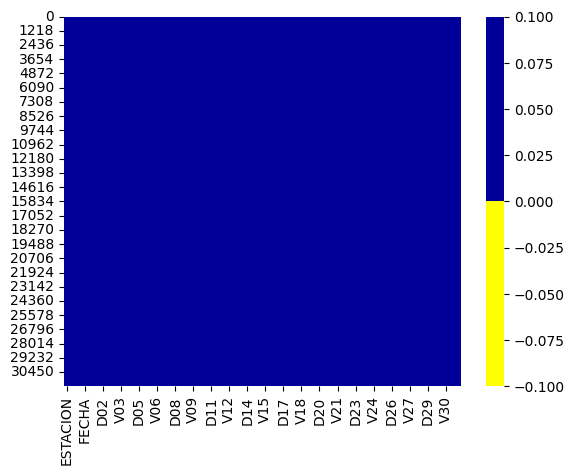

In [33]:
cols = data.columns 
# especificamos los colores - amarillo es un dato faltante. Azul no lo es.
colours = ['#ffff00', '#000099']
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours));

Se puede comprobar que no hay datos faltantes por lo que no va a hacer falta emplear las técnicas que sirven para tratar con dichos datos.

Al principio he eliminado dos columnas que no aportaban ninguna información de calidad, luego he simplificado la información que había en otra y por último, he agrupado la información de 
año y mes en una única columna, dejando el contenido del resto de columnas porque aportan algún tipo de valor, aunque habría que comprobar que no haya valores atípicos en nuestros datos.

## Paso 6: Análisis de la información.

In [34]:
data.describe()

,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31
count,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.00000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.00000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000
mean,27.796346,28.358493,29.757439,30.155357,30.112249,28.666660,29.950186,29.997336,29.438636,36.771102,31.57829,31.934033,31.875655,29.807415,28.849909,30.229433,30.801579,30.836379,30.54711,29.992775,30.209047,30.617314,31.909983,29.951156,29.045744,30.273485,29.554585,29.816848,27.795707,27.718262,17.536529
std,39.386716,40.581817,43.038029,46.916024,47.131433,40.294165,43.983181,42.428816,41.800397,773.814512,47.27999,49.496438,49.044572,45.105071,43.539964,49.796815,45.246964,44.315121,116.82749,43.690367,45.361075,46.492392,146.158190,41.395386,43.945990,44.076901,43.748369,43.777369,43.112657,43.570168,37.050771
min,0.000000,0.000000,-0.070000,0.000000,0.000000,-0.040000,-0.020000,-0.020000,-0.050000,-0.050000,-0.05000,-0.080000,-0.040000,0.000000,-0.140000,0.000000,0.000000,0.000000,0.00000,-0.060000,-0.220000,0.000000,-0.060000,-0.050000,-0.070000,-0.120000,-0.080000,-0.060000,0.000000,-0.040000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.210000,1.000000,0.000000
50%,14.000000,15.000000,15.000000,14.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000,16.00000,16.000000,16.000000,15.000000,15.000000,15.400000,16.000000,16.000000,15.00000,15.000000,15.000000,15.000000,16.000000,16.000000,15.000000,16.000000,16.000000,15.000000,13.000000,12.000000,0.600000
75%,40.000000,40.000000,42.000000,41.000000,41.000000,41.000000,42.000000,43.000000,42.000000,42.000000,44.00000,43.000000,43.000000,41.000000,41.000000,43.000000,43.000000,43.000000,42.00000,42.000000,42.000000,43.000000,44.000000,43.000000,42.000000,43.000000,42.000000,42.000000,40.000000,39.000000,21.000000
max,557.000000,666.000000,627.000000,838.000000,1031.000000,604.000000,654.000000,605.000000,637.000000,97396.000000,711.00000,851.000000,711.000000,1005.000000,1756.000000,4481.000000,603.000000,685.000000,19351.00000,704.000000,748.000000,850.000000,24742.000000,754.000000,2457.000000,1603.000000,1713.000000,1176.000000,1202.000000,741.000000,619.000000


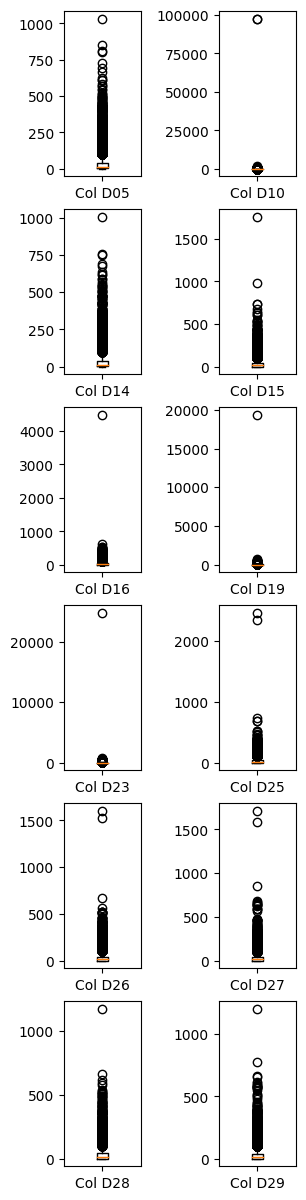

In [35]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12)) = plt.subplots(nrows=6, ncols=2, figsize=(3, 15))

data1 = data['D05']
data2 = data['D10']
data3 = data['D14']
data4 = data['D15']
data5 = data['D16']
data6 = data['D19']
data7 = data['D23']
data8 = data['D25']
data9 = data['D26']
data10 = data['D27']
data11 = data['D28']
data12 = data['D29']

ax1.boxplot(data1,  labels=['Col D05'], showfliers=True)
ax2.boxplot(data2,  labels=['Col D10'], showfliers=True)
ax3.boxplot(data3,  labels=['Col D14'], showfliers=True)
ax4.boxplot(data4,  labels=['Col D15'], showfliers=True)
ax5.boxplot(data5,  labels=['Col D16'], showfliers=True)
ax6.boxplot(data6,  labels=['Col D19'], showfliers=True)
ax7.boxplot(data7,  labels=['Col D23'], showfliers=True)
ax8.boxplot(data8,  labels=['Col D25'], showfliers=True)
ax9.boxplot(data9,  labels=['Col D26'], showfliers=True)
ax10.boxplot(data10,  labels=['Col D27'], showfliers=True)
ax11.boxplot(data11,  labels=['Col D28'], showfliers=True)
ax12.boxplot(data12,  labels=['Col D29'], showfliers=True)

plt.subplots_adjust(wspace=1)
plt.show()

Se observan algunos valores que llaman bastante la atención como los outlayers de las columnas D10, D16 ó D19 y por tanto hay que valorar si 
aportan información vital para nuestro estudio o simplemente son errores de medición. He estado buscando información sobre si pueden haber errores de medición
en el pdf que deja el portal de datos abiertos de la Comunidad de Madrid pero no dice nada que me sirva. Por tanto voy a considerar que los outlayers son
errores y los voy a tratar como tal.

El pdf que habla sobre los datos es el siguiente: <https://datos.madrid.es/FWProjects/egob/Catalogo/MedioAmbiente/Aire/Ficheros/Interprete_ficheros_%20calidad_%20del_%20aire_global.pdf>

## Paso 7: Análisis de valores atípicos.

Voy a proceder a analizar cuantos valores atípicos hay, y para hacerlo analizaré primero los valores que hay por encima del tercer cuartil 
y luego eliminaré aquellos datos que no se repiten, aún así podríamos elegir los 'x' valores que estén por encima de un límite y decidir si eliminarlos todos si fueran todos valores atípicos.

Prefiero quedarme con los valores repetidos que están por encima del tercer cuartil porque considero que si aparecen repetidos será por algo.

In [36]:
for e in range(1, 32):
  if len(str(e)) == 1:
    e = 'D0'+ str(e)
    tercerq = data[e][data[e] > data[e].quantile(0.75)].value_counts()
    tercerq = tercerq[tercerq == 1]
    print(f"Hay {tercerq.sum()} valores atípicos en la columna {e}, un {round(((tercerq.sum() * 100) / data.shape[0]), 2)}% del total.")
  else:
    e = 'D'+ str(e)
    tercerq = data[e][data[e] > data[e].quantile(0.75)].value_counts()
    tercerq = tercerq[tercerq == 1]
    print(f"Hay {tercerq.sum()} valores atípicos en la columna {e}, un {round(((tercerq.sum() * 100) / data.shape[0]), 2)}% del total.")

Hay 65 valores atípicos en la columna D01, un 0.21% del total.
Hay 89 valores atípicos en la columna D02, un 0.28% del total.
Hay 79 valores atípicos en la columna D03, un 0.25% del total.
Hay 91 valores atípicos en la columna D04, un 0.29% del total.
Hay 107 valores atípicos en la columna D05, un 0.34% del total.
Hay 58 valores atípicos en la columna D06, un 0.18% del total.
Hay 86 valores atípicos en la columna D07, un 0.27% del total.
Hay 74 valores atípicos en la columna D08, un 0.23% del total.
Hay 66 valores atípicos en la columna D09, un 0.21% del total.
Hay 97 valores atípicos en la columna D10, un 0.31% del total.
Hay 97 valores atípicos en la columna D11, un 0.31% del total.
Hay 110 valores atípicos en la columna D12, un 0.35% del total.
Hay 109 valores atípicos en la columna D13, un 0.34% del total.
Hay 93 valores atípicos en la columna D14, un 0.29% del total.
Hay 93 valores atípicos en la columna D15, un 0.29% del total.
Hay 69 valores atípicos en la columna D16, un 0.22% 

In [ ]:
#Se puede observar que hay suficientes datos como para poder reemplazarlos, evitando dañar el dataset

In [37]:
numeric_cols = data.select_dtypes(include=[np.number])      #Luego compararé si ha habido alguna diferencia en la media y más importante, en la
numeric_cols.describe()                                     #desviación típica

,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31
count,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.00000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.00000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000
mean,27.796346,28.358493,29.757439,30.155357,30.112249,28.666660,29.950186,29.997336,29.438636,36.771102,31.57829,31.934033,31.875655,29.807415,28.849909,30.229433,30.801579,30.836379,30.54711,29.992775,30.209047,30.617314,31.909983,29.951156,29.045744,30.273485,29.554585,29.816848,27.795707,27.718262,17.536529
std,39.386716,40.581817,43.038029,46.916024,47.131433,40.294165,43.983181,42.428816,41.800397,773.814512,47.27999,49.496438,49.044572,45.105071,43.539964,49.796815,45.246964,44.315121,116.82749,43.690367,45.361075,46.492392,146.158190,41.395386,43.945990,44.076901,43.748369,43.777369,43.112657,43.570168,37.050771
min,0.000000,0.000000,-0.070000,0.000000,0.000000,-0.040000,-0.020000,-0.020000,-0.050000,-0.050000,-0.05000,-0.080000,-0.040000,0.000000,-0.140000,0.000000,0.000000,0.000000,0.00000,-0.060000,-0.220000,0.000000,-0.060000,-0.050000,-0.070000,-0.120000,-0.080000,-0.060000,0.000000,-0.040000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.210000,1.000000,0.000000
50%,14.000000,15.000000,15.000000,14.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000,16.00000,16.000000,16.000000,15.000000,15.000000,15.400000,16.000000,16.000000,15.00000,15.000000,15.000000,15.000000,16.000000,16.000000,15.000000,16.000000,16.000000,15.000000,13.000000,12.000000,0.600000
75%,40.000000,40.000000,42.000000,41.000000,41.000000,41.000000,42.000000,43.000000,42.000000,42.000000,44.00000,43.000000,43.000000,41.000000,41.000000,43.000000,43.000000,43.000000,42.00000,42.000000,42.000000,43.000000,44.000000,43.000000,42.000000,43.000000,42.000000,42.000000,40.000000,39.000000,21.000000
max,557.000000,666.000000,627.000000,838.000000,1031.000000,604.000000,654.000000,605.000000,637.000000,97396.000000,711.00000,851.000000,711.000000,1005.000000,1756.000000,4481.000000,603.000000,685.000000,19351.00000,704.000000,748.000000,850.000000,24742.000000,754.000000,2457.000000,1603.000000,1713.000000,1176.000000,1202.000000,741.000000,619.000000


He decidido sustituir los valores atípicos que sólo aparecen una vez por 0 (así queda reflejado que no se han registrado datos) y dejar en la columna del día una 'N' de 'No válido'. La verdad es que es un riesgo que tomo al no saber plenamente que opción de las que hemos visto para tratar los valores faltantes (Por ejemplo, eliminar las filas o columnas que los contengan o mismamente sustituirlos por la media) sería adecuada para la naturaleza de estos datos y el tratamiento que habría que hacer con datos atípicos. 

He decidido hacerlo así porque viendo el número de valores que están por encima del tercer cuartil es realmente bajo y pienso que para mi estudio no me va a afectar. Aún así, lo que me deja con intriga es como validan los datos, puesto que, si no son valores atípicos porque dan el visto bueno en la validación,  entonces serían valores que tienen un significado importantísimo para este estudio, pero como algún valor es realmente desproporcionado (solo con ver los valores máximos de alguna columna utilizando *data.describe()* se observa alguna irregularidad) he dicidido pensar que no han validado correctamente dichas muestras. 

In [38]:
for e in range(1,32):               #La función value_counts cuando hay más de una columna seleccionada crea un MultiIndex el cual complica el proceso de
    if len(str(e)) == 1:            #seleccionar los valores que están en ese índice. Con un bucle for elimino este problema. 
        day = 'D0' + str(e)
        validation = 'V0' + str(e)
        value_counts = data[day][data[day] > data[day].quantile(0.75)].value_counts()
        unique_values = value_counts[value_counts == 1].index
        data[day][data[day].isin(unique_values)] = 0.0
        data[validation].loc[data[day].isin(unique_values)] = 'N'

    else:
        day = 'D' + str(e)
        validation = 'V' + str(e)
        value_counts = data[day][data[day] > data[day].quantile(0.75)].value_counts()
        unique_values = value_counts[value_counts == 1].index
        data[day][data[day].isin(unique_values)] = 0.0
        data[validation].loc[data[day].isin(unique_values)] = 'N'

In [39]:
numeric_cols = data.select_dtypes(include=[np.number])
numeric_cols.describe()

,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31
count,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000,31660.000000
mean,27.114669,27.380749,28.861589,29.009652,28.750446,28.033906,28.932119,29.170792,28.708585,29.411674,30.347093,30.492122,30.467837,28.635766,27.689612,29.318138,29.717909,29.741496,29.007874,29.126319,29.010121,29.345245,30.095829,29.249324,28.162589,29.319069,28.523284,28.938714,26.739201,26.614421,16.516560
std,36.683634,36.500677,39.434654,41.926333,40.990204,37.754257,39.785891,39.211994,38.916390,41.373915,42.156712,43.313262,43.270066,39.678664,37.297617,40.062626,40.969294,40.138153,39.424921,40.413168,39.898416,40.798336,41.160690,38.586136,36.643930,38.955003,37.367544,39.781510,38.105482,38.849841,32.236905
min,0.000000,0.000000,-0.070000,0.000000,0.000000,-0.040000,-0.020000,-0.020000,-0.050000,-0.050000,-0.050000,-0.080000,-0.040000,0.000000,-0.140000,0.000000,0.000000,0.000000,0.000000,-0.060000,-0.220000,0.000000,-0.060000,-0.050000,-0.070000,-0.120000,-0.080000,-0.060000,0.000000,-0.040000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.935000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.200000,1.000000,0.000000
50%,14.000000,14.000000,15.000000,14.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000,16.000000,15.000000,15.000000,15.000000,14.000000,15.000000,16.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,16.000000,15.000000,15.000000,12.000000,12.000000,0.600000
75%,40.000000,40.000000,42.000000,41.000000,40.000000,41.000000,41.000000,42.000000,42.000000,42.000000,43.000000,43.000000,43.000000,41.000000,40.000000,43.000000,43.000000,43.000000,42.000000,42.000000,42.000000,42.000000,43.000000,43.000000,42.000000,43.000000,42.000000,42.000000,39.000000,39.000000,20.000000
max,478.000000,443.000000,469.000000,556.000000,493.000000,567.000000,507.000000,453.000000,540.000000,550.000000,480.000000,525.000000,451.000000,510.000000,444.000000,435.000000,459.000000,438.000000,474.000000,436.000000,463.000000,546.000000,434.000000,477.000000,404.000000,462.000000,460.000000,518.000000,573.000000,440.000000,382.000000


Se puede observar que la mayoría de medias no han sufrido grandes cambios, excepto las que tenían los valores atípicos más grandes, que suponían que incrementase la media, entonces al eliminarlos la media indudablemente se ve afectada. También se ha reducido la desviación típica, lo que se traduce como una reducción en la dispersión de los datos. Aún así creo que el resultado no afectará mucho en el estudio de estos datos.

In [40]:
data

,ESTACION,MAGNITUD,TECNICA,FECHA,D01,V01,D02,V02,D03,V03,D04,V04,D05,V05,D06,V06,D07,V07,D08,V08,D09,V09,D10,V10,D11,V11,D12,V12,D13,V13,D14,V14,D15,V15,D16,V16,D17,V17,D18,V18,D19,V19,D20,V20,D21,V21,D22,V22,D23,V23,D24,V24,D25,V25,D26,V26,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,4,1,38,2001-01,17.0,V,15.0,V,15.0,V,15.0,V,16.0,V,20.0,V,25.0,V,30.0,V,32.0,V,33.0,V,21.0,V,36.0,V,39.0,V,34.0,V,23.0,V,16.0,V,16.0,V,17.0,V,27.0,V,40.0,V,32.0,V,29.0,V,17.0,V,17.0,V,14.0,V,12.0,V,19.0,V,17.0,V,35.0,V,40.0,V,53.0,V
1,4,1,38,2001-02,40.0,V,42.0,V,38.0,V,29.0,V,18.0,V,23.0,V,16.0,V,17.0,V,17.0,V,21.0,V,36.0,V,40.0,V,37.0,V,26.0,V,23.0,V,27.0,V,33.0,V,26.0,V,26.0,V,40.0,V,42.0,V,42.0,V,42.0,V,27.0,V,21.0,V,22.0,V,20.0,V,22.0,V,0.0,N,0.0,N,0.0,N
2,4,1,38,2001-03,19.0,V,18.0,V,13.0,V,11.0,V,15.0,V,23.0,V,15.0,V,12.0,V,11.0,V,10.0,V,13.0,V,20.0,V,16.0,V,28.0,V,25.0,V,17.0,V,12.0,V,11.0,V,14.0,V,20.0,V,14.0,V,19.0,V,30.0,V,14.0,V,11.0,V,14.0,V,14.0,V,15.0,V,17.0,V,20.0,V,19.0,V
3,4,1,38,2001-04,14.0,V,17.0,V,13.0,V,10.0,V,9.0,V,17.0,V,11.0,V,10.0,V,16.0,V,17.0,V,12.0,V,8.0,V,8.0,V,9.0,V,14.0,V,18.0,V,12.0,V,13.0,V,17.0,V,13.0,V,15.0,V,16.0,V,10.0,V,9.0,V,11.0,V,12.0,V,12.0,V,13.0,V,15.0,V,14.0,V,0.0,N
4,4,1,38,2001-05,10.0,V,11.0,V,16.0,V,18.0,V,15.0,V,13.0,V,13.0,V,17.0,V,13.0,V,13.0,V,18.0,V,14.0,V,8.0,V,9.0,V,8.0,V,9.0,V,9.0,V,9.0,V,9.0,V,8.0,V,9.0,V,9.0,V,11.0,V,11.0,V,13.0,V,13.0,V,11.0,V,15.0,V,16.0,V,15.0,V,18.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31655,60,14,6,2022-07,80.0,V,83.0,V,75.0,V,82.0,N,75.0,V,77.0,V,74.0,N,83.0,V,100.0,V,97.0,V,92.0,V,99.0,V,104.0,V,103.0,V,97.0,V,99.0,V,92.0,V,95.0,V,84.0,V,88.0,V,88.0,V,81.0,V,95.0,V,74.0,V,77.0,V,69.0,V,81.0,V,71.0,V,73.0,V,79.0,V,82.0,V
31656,60,14,6,2022-08,91.0,V,97.0,V,89.0,V,80.0,V,94.0,V,90.0,V,84.0,V,81.0,V,82.0,V,91.0,V,88.0,V,70.0,V,50.0,V,65.0,V,75.0,V,85.0,V,67.0,V,73.0,V,83.0,V,86.0,V,79.0,V,66.0,V,61.0,V,72.0,V,81.0,V,82.0,V,85.0,V,88.0,V,79.0,V,70.0,V,93.0,V
31657,60,14,6,2022-09,81.0,V,78.0,V,78.0,V,75.0,V,59.0,V,60.0,V,68.0,V,57.0,V,57.0,V,64.0,V,57.0,V,51.0,V,53.0,V,53.0,V,48.0,V,49.0,V,72.0,V,71.0,V,59.0,V,63.0,V,63.0,V,61.0,V,66.0,V,71.0,V,71.0,V,75.0,V,44.0,V,49.0,V,59.0,V,58.0,V,0.0,N
31658,60,14,6,2022-10,46.0,V,61.0,V,48.0,V,43.0,V,56.0,V,54.0,V,47.0,V,57.0,V,63.0,V,40.0,V,44.0,V,48.0,V,45.0,V,31.0,V,53.0,V,55.0,V,41.0,V,31.0,V,35.0,V,48.0,V,48.0,V,52.0,V,51.0,V,37.0,V,29.0,V,15.0,V,22.0,V,28.0,V,49.0,V,37.0,V,25.0,V


# Paso 8: Visualización de los datos.

In [41]:
days = []                       #creamos esta lista para que luego sea más cómodo recorrer las columnas de los días
for e in range(1,32):               
    if len(str(e)) == 1: 
        day = 'D0' + str(e)
        days.append(day)
    else:
        day = 'D' + str(e)
        days.append(day)
print(days)

['D01', 'D02', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31']


Voy a cambiar las categorías con el fin de que sea más representativa la información del estudio que ahora llevaré a cabo.

In [42]:
data['MAGNITUD'] = data['MAGNITUD'].map(magnitud)
data['MAGNITUD'] 

0        Dióxido de Azufre
1        Dióxido de Azufre
2        Dióxido de Azufre
3        Dióxido de Azufre
4        Dióxido de Azufre
               ...        
31655                Ozono
31656                Ozono
31657                Ozono
31658                Ozono
31659                Ozono
Name: MAGNITUD, Length: 31660, dtype: category
Categories (14, object): ['Dióxido de Azufre', 'Monóxido de Carbono', 'Monóxido de Nitrógeno', 'Dióxido de Nitrógeno', ..., 'Etilbenceno', 'Hidrocarburos totales (hexano)', 'Metano', 'Hidrocarburos no metánicos (hexano)']

In [43]:
data['TECNICA'] = data['TECNICA'].map(tecnica)
data['TECNICA'] 

0        Fluorescencia ultravioleta
1        Fluorescencia ultravioleta
2        Fluorescencia ultravioleta
3        Fluorescencia ultravioleta
4        Fluorescencia ultravioleta
                    ...            
31655        Absorción ultravioleta
31656        Absorción ultravioleta
31657        Absorción ultravioleta
31658        Absorción ultravioleta
31659        Absorción ultravioleta
Name: TECNICA, Length: 31660, dtype: category
Categories (7, object): ['Ionización de llama', 'Absorción ultravioleta', 'Quimioluminiscencia', 'Fluorescencia ultravioleta', 'Microbalanza', 'Absorción infrarroja', 'Cromatografía de gases']

In [45]:
new_cat = data.memory_usage(deep=True).sum()

print("Antes {:03.2f} MB".format(usage_cat/1024 ** 2))
print("Después {:03.2f} MB".format(new_cat/1024 ** 2))
print("Ampliación al {:02.2f}%".format(usage_cat/new_cat*100))

Antes 8.76 MB
Después 8.77 MB
Ampliación al 99.98%


## Las 10 filas con los valores más altos del mes

In [46]:
data_top_10 = data.nlargest(10, days).sort_values(days, ascending=False)
data_top_10

,ESTACION,MAGNITUD,TECNICA,FECHA,D01,V01,D02,V02,D03,V03,D04,V04,D05,V05,D06,V06,D07,V07,D08,V08,D09,V09,D10,V10,D11,V11,D12,V12,D13,V13,D14,V14,D15,V15,D16,V16,D17,V17,D18,V18,D19,V19,D20,V20,D21,V21,D22,V22,D23,V23,D24,V24,D25,V25,D26,V26,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
697,38,Óxidos de Nitrógeno,Quimioluminiscencia,2001-12,478.0,V,383.0,V,0.0,V,0.0,V,0.0,V,0.0,V,0.0,V,243.0,V,141.0,V,161.0,V,141.0,V,292.0,V,0.0,V,0.0,V,192.0,V,405.0,V,259.0,V,182.0,V,218.0,V,306.0,V,0.0,V,0.0,V,136.0,V,146.0,V,143.0,V,0.0,V,0.0,V,0.0,V,387.0,V,349.0,V,318.0,V
4568,39,Óxidos de Nitrógeno,Quimioluminiscencia,2005-01,478.0,V,148.0,V,229.0,V,271.0,V,0.0,V,284.0,V,0.0,V,0.0,V,337.0,V,550.0,V,480.0,V,460.0,V,0.0,V,0.0,V,0.0,V,0.0,V,0.0,V,309.0,V,159.0,V,158.0,V,0.0,V,0.0,V,252.0,V,82.0,V,33.0,V,29.0,V,84.0,V,162.0,V,85.0,V,49.0,V,223.0,V
4773,8,Óxidos de Nitrógeno,Quimioluminiscencia,2006-02,419.0,V,420.0,V,259.0,V,123.0,V,143.0,V,0.0,V,0.0,V,0.0,V,0.0,V,0.0,V,330.0,V,197.0,V,0.0,V,335.0,V,355.0,V,154.0,V,161.0,V,106.0,V,90.0,V,144.0,V,148.0,V,129.0,V,173.0,V,225.0,V,136.0,V,98.0,V,233.0,V,169.0,V,0.0,N,0.0,N,0.0,N
1535,39,Óxidos de Nitrógeno,Quimioluminiscencia,2002-02,419.0,V,346.0,V,158.0,V,142.0,V,102.0,V,68.0,V,208.0,V,453.0,V,254.0,V,212.0,V,289.0,V,386.0,V,0.0,V,50.0,V,80.0,V,70.0,V,65.0,V,129.0,V,91.0,V,234.0,V,195.0,V,211.0,V,349.0,V,159.0,V,189.0,V,178.0,V,99.0,V,93.0,V,0.0,N,0.0,N,0.0,N
923,11,Óxidos de Nitrógeno,Quimioluminiscencia,2002-02,419.0,V,243.0,V,151.0,V,155.0,V,102.0,V,119.0,V,0.0,V,0.0,V,236.0,V,175.0,V,252.0,V,295.0,V,207.0,V,178.0,V,114.0,V,54.0,V,71.0,V,100.0,V,111.0,V,193.0,V,178.0,V,252.0,V,0.0,V,119.0,V,138.0,V,178.0,V,88.0,V,89.0,V,0.0,N,0.0,N,0.0,N
18751,39,Óxidos de Nitrógeno,Quimioluminiscencia,2015-12,400.0,V,0.0,V,469.0,V,541.0,V,0.0,V,247.0,V,101.0,V,105.0,V,225.0,V,155.0,V,91.0,V,53.0,V,111.0,V,155.0,V,0.0,V,352.0,V,0.0,V,270.0,V,323.0,V,126.0,V,267.0,V,396.0,V,0.0,V,288.0,V,240.0,V,162.0,V,48.0,V,88.0,V,83.0,V,71.0,V,85.0,V
1487,38,Óxidos de Nitrógeno,Quimioluminiscencia,2002-02,400.0,V,0.0,V,140.0,V,145.0,V,89.0,V,78.0,V,220.0,V,0.0,V,326.0,V,185.0,V,258.0,V,363.0,V,366.0,V,127.0,V,167.0,V,121.0,V,118.0,V,163.0,V,166.0,V,200.0,V,233.0,V,258.0,V,334.0,V,139.0,V,165.0,V,134.0,V,89.0,V,83.0,V,0.0,N,0.0,N,0.0,N
253,17,Óxidos de Nitrógeno,Quimioluminiscencia,2001-12,383.0,V,281.0,V,0.0,V,0.0,V,0.0,V,0.0,V,0.0,V,0.0,V,190.0,V,121.0,V,107.0,V,0.0,V,0.0,V,471.0,V,147.0,V,0.0,V,361.0,V,107.0,V,163.0,V,0.0,V,333.0,V,0.0,V,71.0,V,108.0,V,147.0,V,0.0,V,0.0,V,0.0,V,387.0,V,247.0,V,0.0,V
18883,47,Óxidos de Nitrógeno,Quimioluminiscencia,2015-12,383.0,V,0.0,V,322.0,V,371.0,V,242.0,V,166.0,V,125.0,V,143.0,V,200.0,V,161.0,V,94.0,V,57.0,V,157.0,V,77.0,V,254.0,V,254.0,V,0.0,V,291.0,V,261.0,V,142.0,V,220.0,V,266.0,V,299.0,V,206.0,V,186.0,V,170.0,V,100.0,V,70.0,V,55.0,V,50.0,V,81.0,V
6379,36,Óxidos de Nitrógeno,Quimioluminiscencia,2007-02,371.0,V,163.0,V,80.0,V,117.0,V,164.0,V,186.0,V,87.0,V,127.0,V,59.0,V,43.0,V,31.0,V,75.0,V,244.0,V,106.0,V,225.0,V,184.0,V,115.0,V,105.0,V,450.0,V,0.0,V,0.0,V,202.0,V,181.0,V,161.0,V,109.0,V,74.0,V,128.0,V,94.0,V,0.0,N,0.0,N,0.0,N


In [47]:
most_representative = data_top_10.groupby(['MAGNITUD','TECNICA','FECHA']).size()
most_representative[most_representative>0]

MAGNITUD             TECNICA              FECHA  
Óxidos de Nitrógeno  Quimioluminiscencia  2001-12    2
                                          2002-02    3
                                          2005-01    1
                                          2006-02    1
                                          2007-02    1
                                          2015-12    2
dtype: int64

De esta manera obtenemos la magnitud, la técnica y la fecha de las 10 filas con más contaminación, destacando que el elemento cuyo niveles de contaminación son los más altos son los del óxido de nitrógeno y que el mes que más veces aparece es el febrero del 2002

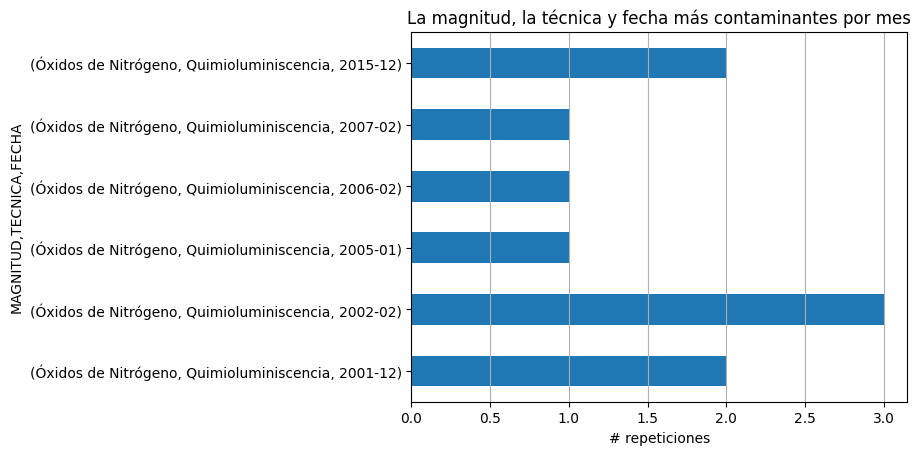

In [50]:
most_representative[most_representative>0].plot.barh(title='La magnitud, la técnica y fecha más contaminantes por mes',xlabel='# repeticiones').grid(axis='x')

## La media de contaminación total por mes

In [51]:
df_numeric  = data.select_dtypes(include=[np.number,'period[M]'])
df_numeric

,FECHA,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31
0,2001-01,17.0,15.0,15.0,15.0,16.0,20.0,25.0,30.0,32.0,33.0,21.0,36.0,39.0,34.0,23.0,16.0,16.0,17.0,27.0,40.0,32.0,29.0,17.0,17.0,14.0,12.0,19.0,17.0,35.0,40.0,53.0
1,2001-02,40.0,42.0,38.0,29.0,18.0,23.0,16.0,17.0,17.0,21.0,36.0,40.0,37.0,26.0,23.0,27.0,33.0,26.0,26.0,40.0,42.0,42.0,42.0,27.0,21.0,22.0,20.0,22.0,0.0,0.0,0.0
2,2001-03,19.0,18.0,13.0,11.0,15.0,23.0,15.0,12.0,11.0,10.0,13.0,20.0,16.0,28.0,25.0,17.0,12.0,11.0,14.0,20.0,14.0,19.0,30.0,14.0,11.0,14.0,14.0,15.0,17.0,20.0,19.0
3,2001-04,14.0,17.0,13.0,10.0,9.0,17.0,11.0,10.0,16.0,17.0,12.0,8.0,8.0,9.0,14.0,18.0,12.0,13.0,17.0,13.0,15.0,16.0,10.0,9.0,11.0,12.0,12.0,13.0,15.0,14.0,0.0
4,2001-05,10.0,11.0,16.0,18.0,15.0,13.0,13.0,17.0,13.0,13.0,18.0,14.0,8.0,9.0,8.0,9.0,9.0,9.0,9.0,8.0,9.0,9.0,11.0,11.0,13.0,13.0,11.0,15.0,16.0,15.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31655,2022-07,80.0,83.0,75.0,82.0,75.0,77.0,74.0,83.0,100.0,97.0,92.0,99.0,104.0,103.0,97.0,99.0,92.0,95.0,84.0,88.0,88.0,81.0,95.0,74.0,77.0,69.0,81.0,71.0,73.0,79.0,82.0
31656,2022-08,91.0,97.0,89.0,80.0,94.0,90.0,84.0,81.0,82.0,91.0,88.0,70.0,50.0,65.0,75.0,85.0,67.0,73.0,83.0,86.0,79.0,66.0,61.0,72.0,81.0,82.0,85.0,88.0,79.0,70.0,93.0
31657,2022-09,81.0,78.0,78.0,75.0,59.0,60.0,68.0,57.0,57.0,64.0,57.0,51.0,53.0,53.0,48.0,49.0,72.0,71.0,59.0,63.0,63.0,61.0,66.0,71.0,71.0,75.0,44.0,49.0,59.0,58.0,0.0
31658,2022-10,46.0,61.0,48.0,43.0,56.0,54.0,47.0,57.0,63.0,40.0,44.0,48.0,45.0,31.0,53.0,55.0,41.0,31.0,35.0,48.0,48.0,52.0,51.0,37.0,29.0,15.0,22.0,28.0,49.0,37.0,25.0


In [52]:
mont_med = df_numeric.groupby('FECHA').aggregate(['mean'])
mont_med

,D01,D02,D03,D04,D05,D06,D07,D08,D09,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
FECHA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01,36.058919,37.603108,42.541622,44.741351,48.899865,33.373784,36.047027,64.222027,77.529324,72.350811,47.856757,55.171081,64.952838,75.732973,62.951622,40.509595,43.847297,43.539730,59.148919,87.200135,70.435000,72.183784,35.307568,35.345000,35.299189,38.169595,39.616486,21.466486,46.287703,71.110270,62.129459
2001-02,69.255135,73.894054,72.357838,41.767432,58.216757,47.671622,42.573243,39.702432,43.059865,48.385135,62.179459,73.024054,67.067973,43.392162,38.217027,50.674189,61.542703,53.672973,49.188378,64.888378,78.597432,91.191351,84.085676,45.269595,26.327297,51.712162,35.054189,36.245946,0.000000,0.000000,0.000000
2001-03,51.033151,36.770548,29.389863,31.638493,40.207260,46.732055,41.932877,33.751370,29.349589,21.766986,23.063425,38.078630,39.180548,61.335342,56.983699,40.646986,29.424110,27.158904,29.943425,37.000959,26.371233,38.471507,60.839315,24.634795,20.214795,34.600959,36.438356,32.605205,25.582877,26.529178,36.591781
2001-04,27.946892,42.175811,33.561486,30.743649,29.192973,54.301892,21.211622,20.009189,47.672162,45.605270,27.944865,20.124054,18.209459,20.609459,30.141216,55.310541,33.428784,38.854054,45.425676,23.328649,24.357297,24.685541,18.871892,21.165270,25.849459,37.290541,38.249189,30.810541,39.895811,22.480811,0.000000
2001-05,21.897101,29.195072,40.012464,34.826957,29.550435,24.532754,32.620000,41.120435,36.935362,42.980870,68.399420,56.084348,20.131304,28.223478,19.393913,29.768116,30.766377,26.062174,25.915652,24.965217,36.193333,39.716522,43.501159,38.978116,46.227971,36.744493,28.571014,61.823913,50.166667,53.958551,53.782899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07,18.778906,19.434375,18.920313,21.523438,22.144531,21.650781,16.567187,20.976562,22.463281,20.792188,23.725781,24.587500,31.841406,26.103906,24.323438,20.935938,21.744531,22.563281,18.953906,24.583594,25.098437,23.594531,21.555469,20.101562,19.010156,20.492969,20.085156,20.602344,21.091406,19.104688,23.157031
2022-08,22.582031,23.067187,26.244531,23.671094,22.027344,20.041406,17.984375,22.967188,21.189062,19.139063,22.201563,26.366406,26.620313,14.907813,16.276563,18.484375,14.839063,13.269531,16.776563,18.286719,19.761719,14.685937,17.292969,22.321094,20.250781,15.575781,17.927344,16.456250,19.541406,23.359375,18.344531


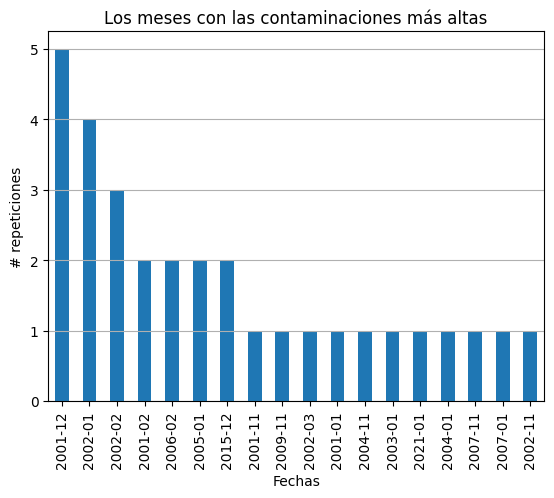

In [53]:
graph = mont_med.idxmax().value_counts()
graph.plot.bar(title='Los meses con las contaminaciones más altas', xlabel='Fechas', ylabel='# repeticiones').grid(axis='y')

Estas son los meses y los años con los niveles de contaminación más altos. En diciembre del 2001 se registran los niveles de contaminación más altos.

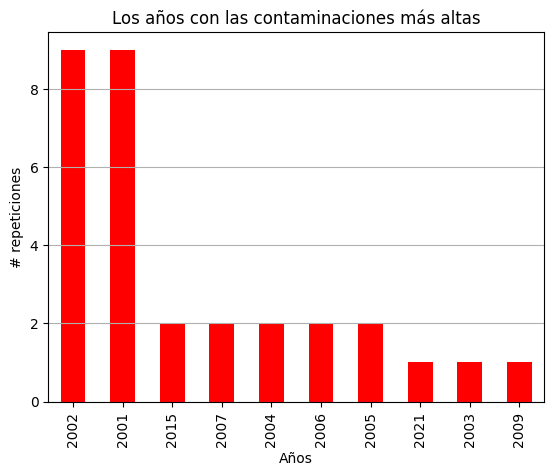

In [54]:
mont_med.index = mont_med.index.year

graph2 = mont_med.idxmax().value_counts()
graph2.plot.bar(title='Los años con las contaminaciones más altas', xlabel='Años', ylabel='# repeticiones',color='red').grid(axis='y')

2001 y 2002 fueron los años con las contaminaciones más altas.